In [ ]:
#通过人脸识别案例来弄明白components_属性

In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60)#数据的实例化

In [8]:
faces.images.shape
#（1348,62,47）
#1348是图像的个数
#62是每个图像的特征矩阵的行
#47是每个图像的特征矩阵的列

(1348, 62, 47)

In [6]:
faces.data.shape
#（1348,2914）1348行，2914个特征

(1348, 2914)

In [50]:
X = faces.data

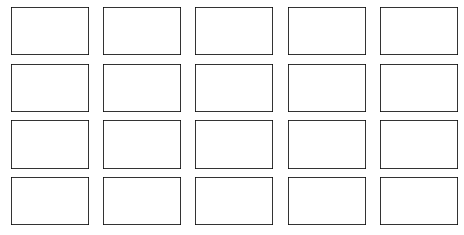

In [18]:
#数据本身是图像，和数据本身只是数字，使用的可视化方法不同
#创建画布和子图对象
fig, axes = plt.subplots(4,5
                         ,figsize=(8,4)
                         ,subplot_kw = {"xticks":[],"yticks":[]} #不要显示坐标轴
                        )

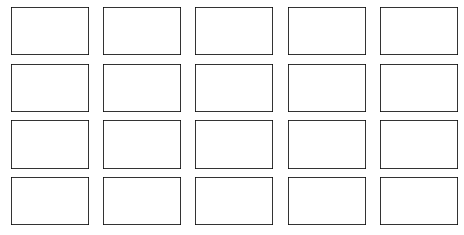

In [21]:
fig#存放的是我们画好的画布

In [25]:
axes.shape#axes是一个四行五列的数组，即，即一个个子图对象
#不难发现，axes中的一个对象对应fig中的一个空格
#我们希望，在每一个子图对象中填充图像（共24张图），因此我们需要写一个在子图对象中遍历的循环

(4, 5)

In [28]:
axes[0][0].imshow(faces.images[0,:,:])
#0代表第一个图像，后面两个代表取出这个图像的所有行和列

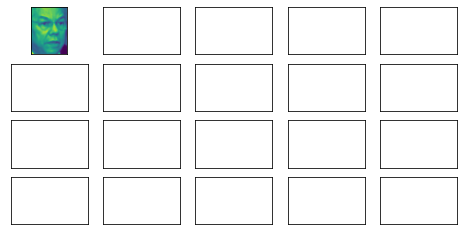

In [31]:
fig, axes = plt.subplots(4,5
                         ,figsize=(8,4)
                         ,subplot_kw = {"xticks":[],"yticks":[]} #不要显示坐标轴
                        )
axes[0][0].imshow(faces.images[0,:,:])
#把这个图像放入画布里，即可以展示出第一个图像

In [32]:
#imshow要求的数据格式必须是一个(m,n)格式的矩阵，即每个数据都是一张单独的图
#因此我们需要遍历的是faces.images，其结构是(1277, 62, 47)
#要从一个数据集中取出24个图，明显是一次性的循环切片[i,:,:]来得便利
#因此我们要把axes的结构拉成一维来循环

In [36]:
#二维变一维度
len([*axes.flat])

20

In [39]:
[*enumerate(axes.flat)]#将20个对象与索引放到一个元组中，便于取值

[(0, <AxesSubplot:>),
 (1, <AxesSubplot:>),
 (2, <AxesSubplot:>),
 (3, <AxesSubplot:>),
 (4, <AxesSubplot:>),
 (5, <AxesSubplot:>),
 (6, <AxesSubplot:>),
 (7, <AxesSubplot:>),
 (8, <AxesSubplot:>),
 (9, <AxesSubplot:>),
 (10, <AxesSubplot:>),
 (11, <AxesSubplot:>),
 (12, <AxesSubplot:>),
 (13, <AxesSubplot:>),
 (14, <AxesSubplot:>),
 (15, <AxesSubplot:>),
 (16, <AxesSubplot:>),
 (17, <AxesSubplot:>),
 (18, <AxesSubplot:>),
 (19, <AxesSubplot:>)]

In [42]:
for i, ax in enumerate(axes.flat):#通过i和ax遍历数字和图像
    print(i)
    print(ax)

0
AxesSubplot(0.160705,0.71587;0.0622107x0.16413)
1
AxesSubplot(0.285345,0.71587;0.133621x0.16413)
2
AxesSubplot(0.44569,0.71587;0.133621x0.16413)
3
AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4
AxesSubplot(0.766379,0.71587;0.133621x0.16413)
5
AxesSubplot(0.125,0.518913;0.133621x0.16413)
6
AxesSubplot(0.285345,0.518913;0.133621x0.16413)
7
AxesSubplot(0.44569,0.518913;0.133621x0.16413)
8
AxesSubplot(0.606034,0.518913;0.133621x0.16413)
9
AxesSubplot(0.766379,0.518913;0.133621x0.16413)
10
AxesSubplot(0.125,0.321957;0.133621x0.16413)
11
AxesSubplot(0.285345,0.321957;0.133621x0.16413)
12
AxesSubplot(0.44569,0.321957;0.133621x0.16413)
13
AxesSubplot(0.606034,0.321957;0.133621x0.16413)
14
AxesSubplot(0.766379,0.321957;0.133621x0.16413)
15
AxesSubplot(0.125,0.125;0.133621x0.16413)
16
AxesSubplot(0.285345,0.125;0.133621x0.16413)
17
AxesSubplot(0.44569,0.125;0.133621x0.16413)
18
AxesSubplot(0.606034,0.125;0.133621x0.16413)
19
AxesSubplot(0.766379,0.125;0.133621x0.16413)


In [44]:
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:],cmap="gray") #选择色彩的模式

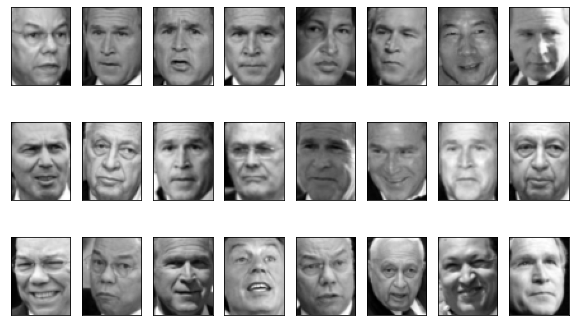

In [58]:
#将循环放入画布中，才能显示对象
fig, axes = plt.subplots(3,8
                         ,figsize=(10,6)
                         ,subplot_kw = {"xticks":[],"yticks":[]} #不要显示坐标轴
                        )
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:],cmap="gray") #选择色彩的模式

In [51]:
#开始降维
pca = PCA(150).fit(X)
#主要X是faces.data，不是faces.images，前者是二维，后者是三维，
#这是由于sklearn的PCA算法只接受二维数据，所以在data里面就把图像的行和列相乘为一个特征了

In [53]:
#查看特征矩阵V
V = pca.components_
V.shape#（150,2914）降维到了150的维度

(150, 2914)

In [57]:
V[0].reshape(62,47).shape#因为在V中，只有两维数据，显示图像需要三维，而这一步就是把一维度变二维，才能显示图像

(62, 47)

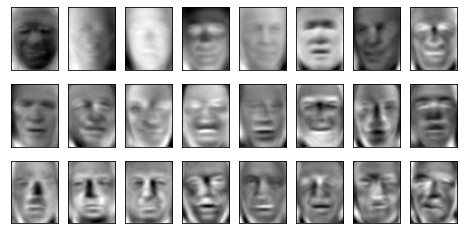

In [55]:
#将V可视化
fig, axes = plt.subplots(3,8,figsize=(8,4),subplot_kw = {"xticks":[],"yticks":[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47),cmap="gray")